In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        import numpy as np

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

/kaggle/input/heartdisease/heart.csv
/kaggle/input/irisdata/iris.csv


2024-02-01 19:21:27.656963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 19:21:27.657128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 19:21:27.829595: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/irisdata/iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df1=df[['class','sepal_length','sepal_width','petal_length','petal_width']]
print(df1.shape)

(150, 5)


In [6]:
df1["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

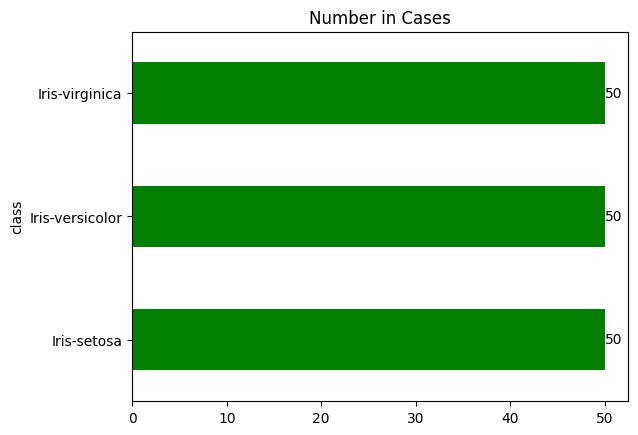

In [9]:
xf = df.groupby('class')['class'].count().plot(kind='barh', color='green',title='Number in Cases',legend=False)
xf.bar_label(xf.containers[0], label_type='edge')

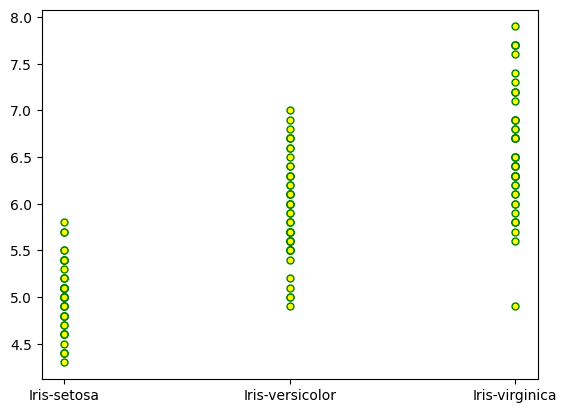

In [17]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df1['class'],df1['sepal_length'], marker='o', color='yellow',
            s=25, edgecolor='green');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

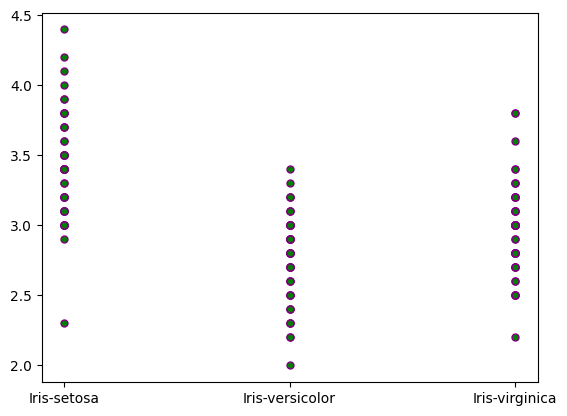

In [16]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df1['class'],df1['sepal_width'], marker='o', color='green',
            s=25, edgecolor='purple');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

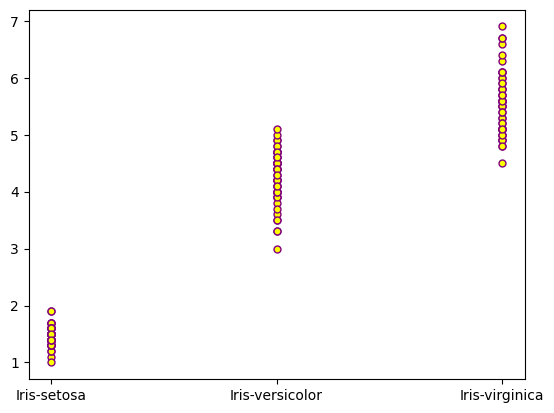

In [18]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df1['class'],df1['petal_length'], marker='o', color='yellow',
            s=25, edgecolor='purple');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

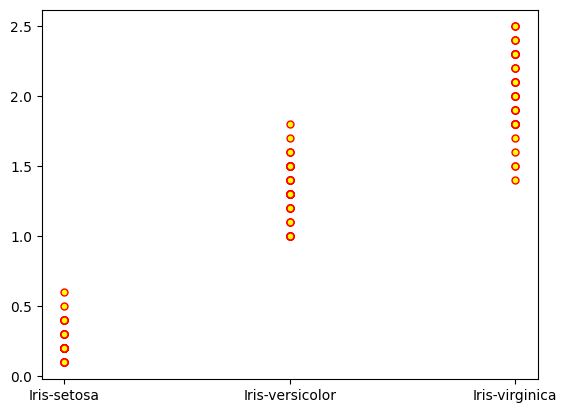

In [19]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df1['class'],df1['petal_width'], marker='o', color='yellow',
            s=25, edgecolor='red');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

In [21]:
df2=df[['sepal_length','sepal_width','petal_length','petal_width']]
print(df1.shape)

(150, 5)


<Axes: >

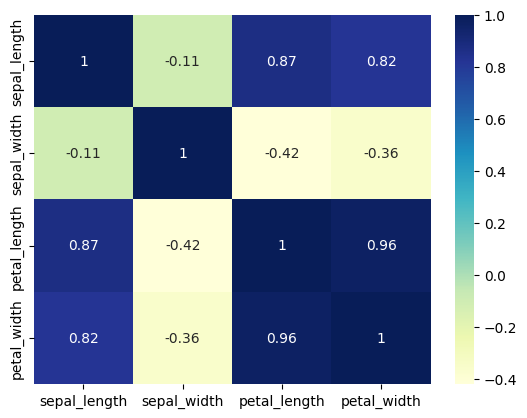

In [25]:
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [26]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)

In [27]:
X=df["class"]
y=df[['sepal_length','sepal_width','petal_length','petal_width']]

In [28]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

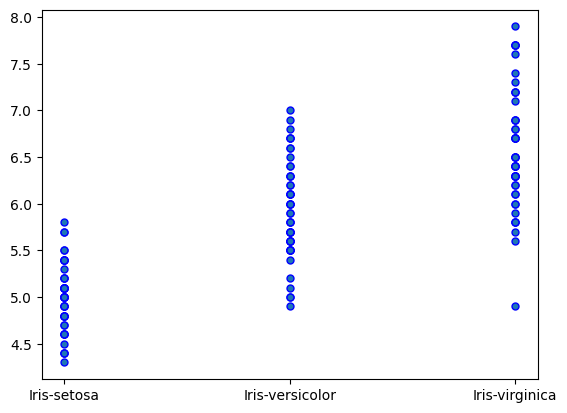

In [31]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df1["class"], df['sepal_length'], marker='o', s=25, edgecolor='b');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)

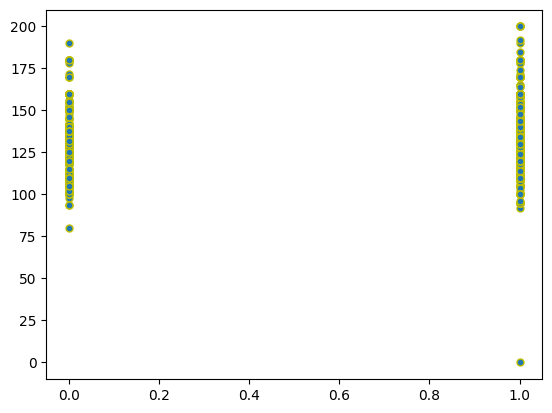

In [16]:
plt.scatter(df1["class"], df1['RestingBP'], marker='o', s=25, edgecolor='y');

In [32]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()

In [35]:
LR_clf.fit(X_train, y_train)

LogisticRegression()

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier().fit(X1_train, y1_train)

print('Training Accuracy of Decision Tree Model= {:.2f}'
     .format(DT_model.score(X1_train, y1_train)))
print('Training Accuracy of Decision Tree Model= {:.2f}'
     .format(DT_model.score(X1_valid, y1_valid)))

Training Accuracy of Decision Tree Model= 1.00
Training Accuracy of Decision Tree Model= 0.76


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X1_train, y1_train)

print('Training Accuracy of K-NN Model= {:.2f}'
     .format(knn_model.score(X1_train, y1_train)))
print('Test Accuracy of K-NN Model=: {:.2f}'
     .format(knn_model.score(X1_valid, y1_valid)))

Training Accuracy of K-NN Model= 0.99
Test Accuracy of K-NN Model=: 0.96


In [40]:
x = np.array(df1[['sepal_length','sepal_width','petal_length','petal_width']])
y = np.array(df[["class"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
decisiontree = DecisionTreeClassifier()

knearestclassifier = KNeighborsClassifier()




knearestclassifier.fit(xtrain, ytrain)
decisiontree.fit(xtrain, ytrain)




data1 = {"Classification Algorithms": ["KNN Model", "Decision Tree Model"],
      "Training Accuracy": [knearestclassifier.score(xtrain,ytrain), decisiontree.score(xtrain,ytrain)],
      "Valudation Accuracy": [knearestclassifier.score(xtest,ytest), decisiontree.score(xtest,ytest)]}
score = pd.DataFrame(data1)
score

,Classification Algorithms,Training Accuracy,Valudation Accuracy
0,KNN Model,0.97037,1.0
1,Decision Tree Model,1.00000,1.0
